In [179]:
import pandas as pd
import numpy as np
import spacy
import regex as re

import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

import nltk
from nltk import sent_tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')

from urllib.request import urlopen
from collections import Counter

from math import isnan

[nltk_data] Downloading package punkt to /Users/uzay/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/uzay/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Q1

## Chess Transfers

For this question we are going to use the following dataset:

In [20]:
chess = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/chess-transfers/transfers.csv')
chess

,url,ID,Federation,Form.Fed,Transfer Date
0,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
1,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
2,https://ratings.fide.com/fedchange.phtml?year=...,14401762,BIH,YUG,1/31/00
3,https://ratings.fide.com/fedchange.phtml?year=...,2019221,USA,PHI,12/15/00
4,https://ratings.fide.com/fedchange.phtml?year=...,14401754,BIH,CRO,1/31/00
...,...,...,...,...,...
927,https://ratings.fide.com/fedchange.phtml?year=...,1628313,GER,AUT,1/9/17
928,https://ratings.fide.com/fedchange.phtml?year=...,5200393,SGP,PHI,1/11/17
929,https://ratings.fide.com/fedchange.phtml?year=...,2002515,POL,USA,1/9/17
930,https://ratings.fide.com/fedchange.phtml?year=...,407747,SCO,ENG,1/12/17


The data shows chess grand masters moving one chess federation to another chess federation.

1. Calculate the number of chess masters moved to each federation. You must obtain a pandas data frame with two columns: Federation name and the number of grand masters moved into that specific federation.
2. Sort the table (highest to the lowest.)
3. DIsplay the top 10 federations as a bar chart.
4. Construct a python dictionary where the keys are pairs of federations (A,B) and the values are number of times grand masters moved from federation A to federation B.
5. Filter the dictionary and retain only the pairs that appear 5 or more times.
6. Constuct a **directed** `networkx` graph from the keys of the dictionary you constructed in step 5.
7. Display the graph.

In [21]:
chess_count = Counter(chess['Federation'])
fed_count = pd.DataFrame({'Federation': chess_count.keys(), 'Count': chess_count.values()}).sort_values(by='Count', ascending=False)
fed_count

,Federation,Count
0,USA,89
17,GER,55
5,CAN,44
16,ESP,41
13,RUS,36
...,...,...
51,PUR,1
84,ARG,1
53,QAT,1
54,CYP,1


<AxesSubplot:xlabel='Federation'>

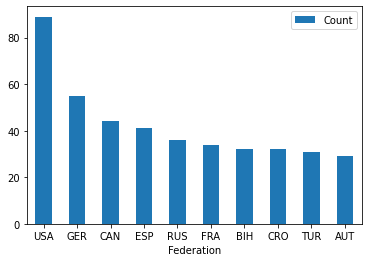

In [22]:
top_ten = fed_count.iloc[:10]
top_ten.plot.bar(x='Federation', y='Count', rot=0) 

In [23]:
zipper = zip(chess['Form.Fed'], chess['Federation'])
pc = Counter(zipper)
pc

Counter({('PHI', 'USA'): 6,
         ('CRO', 'BIH'): 8,
         ('YUG', 'BIH'): 2,
         ('HON', 'ESA'): 2,
         ('ISR', 'AUT'): 2,
         ('CAN', 'AUS'): 2,
         ('YUG', 'CAN'): 4,
         ('AZE', 'USA'): 3,
         ('ENG', 'CAN'): 2,
         ('GER', 'ITA'): 3,
         ('ESP', 'PAR'): 2,
         ('GEO', 'USA'): 4,
         ('GER', 'SUI'): 9,
         ('BEL', 'YUG'): 2,
         ('CRO', 'CHI'): 2,
         ('RUS', 'UKR'): 10,
         ('LBN', 'SVK'): 2,
         ('UZB', 'RUS'): 4,
         ('RUS', 'USA'): 7,
         ('AUT', 'SUI'): 2,
         ('ARM', 'USA'): 8,
         ('UKR', 'BUL'): 2,
         ('MNC', 'FRA'): 2,
         ('FRA', 'ESP'): 2,
         ('RUS', 'GER'): 16,
         ('CAN', 'YUG'): 4,
         ('ROM', 'ESP'): 2,
         ('ENG', 'JCI'): 2,
         ('CAN', 'ROM'): 2,
         ('BUL', 'MKD'): 2,
         ('ESP', 'HON'): 2,
         ('SVK', 'CAN'): 2,
         ('IRL', 'ENG'): 2,
         ('YUG', 'SVK'): 2,
         ('BIH', 'GER'): 4,
         ('USA', '

In [24]:
pc_filtered = {k: v for k, v in pc.items() if v >= 5}
pc_filtered

{('PHI', 'USA'): 6,
 ('CRO', 'BIH'): 8,
 ('GER', 'SUI'): 9,
 ('RUS', 'UKR'): 10,
 ('RUS', 'USA'): 7,
 ('ARM', 'USA'): 8,
 ('RUS', 'GER'): 16,
 ('USA', 'CAN'): 5,
 ('UKR', 'USA'): 7,
 ('ISR', 'CAN'): 7,
 ('RUS', 'ISR'): 5,
 ('CUB', 'USA'): 7,
 ('CUB', 'ESP'): 7,
 ('ESP', 'AND'): 7,
 ('RUS', 'CZE'): 8,
 ('GER', 'LIE'): 5,
 ('UKR', 'GER'): 12,
 ('ARG', 'ESP'): 5,
 ('SCG', 'CRO'): 10,
 ('SVK', 'CZE'): 8,
 ('BIH', 'CRO'): 8,
 ('UKR', 'RUS'): 14,
 ('SRB', 'CRO'): 6,
 ('CHN', 'SIN'): 5,
 ('ENG', 'WLS'): 7,
 ('SRB', 'BIH'): 18,
 ('IND', 'USA'): 11,
 ('ROU', 'FRA'): 8,
 ('FRA', 'MNC'): 17,
 ('AZE', 'TUR'): 8,
 ('HUN', 'AUT'): 5,
 ('SYR', 'FIN'): 6}

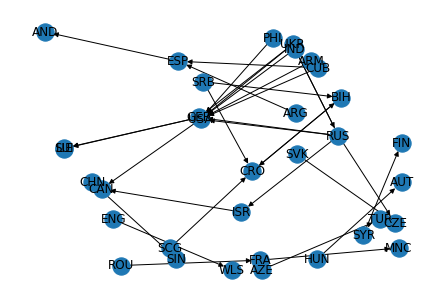

In [25]:
chess_network = nx.DiGraph()
chess_network.add_edges_from(pc_filtered.keys())
nx.draw_kamada_kawai(chess_network, with_labels=True)

# Q2

## NBA Players

For this question we are going to use the following dataset:

In [26]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
582463,431,1,9,634,21801037,NaN,NaN,0:04,4,3.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cavaliers Timeout: Regular (Reg.6 Short 0),10:49 PM
582464,432,0,8,635,21801037,NaN,NaN,0:04,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUB: Clarkson FOR Zizic,10:50 PM
582465,433,63,2,638,21801037,NaN,NaN,0:02,4,5.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MISS Stauskas 24' 3PT Fadeaway Jumper,10:51 PM
582466,434,0,4,639,21801037,Kleber REBOUND (Off:5 Def:7),NaN,0:02,4,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10:51 PM


The data contains play-by-play information about all games from the 2018-2019 NBA season. We are interested in the columns 'PLAYER1_ID', 'PLAYER1_NAME', 'PLAYER2_ID', 'PLAYER2_NAME', 'PLAYER3_ID', 'PLAYER3_NAME'. If the specific entry involves two or more players PLAYER2_ID, PLAYER2_NAME, PLAYER3_ID, PLAYER3_NAME are going to be non-empty. 

1. Construct a list of pairs that contains pairs of player names in interaction. If the play-by-play involves 3 players A,B and C you must have 2 entries: A,B and A,C (write the pairs in the dictionary order).
2. Construct a python  dictionary where the keys are pairs of player names and the values are the number of times each pair appears in the list you constructed in step 1.
3. Filter the list and keep only the entries that appear more than 74 times (i.e. 75 or more).
4. Construct a `igraph` graph from the data you obtained from step 3.
5. Display the graph.
6. List the maximal cliques using the `maximal_cliques` of the graph data structure.

In [102]:
p = pd.DataFrame({'player1': NBA['PLAYER1_NAME'], 'player2': NBA['PLAYER2_NAME'], 'player3': NBA['PLAYER3_NAME']}).dropna(thresh=2)

def createClique(row):
    if type(row.player2) == float:
        return (row.player1, row.player3) if row.player1 > row.player3 else (row.player3, row.player1)
    elif type(row.player3) == float:
        return (row.player1, row.player2) if row.player1 > row.player2 else (row.player2, row.player1)
    else:
        tuple1 = (row.player1, row.player2) if row.player1 > row.player2 else (row.player2, row.player1)
        tuple2 = (row.player1, row.player3) if row.player1 > row.player3 else (row.player3, row.player1)
        return tuple1, tuple2

interactionsSeries = p.apply(createClique, axis=1)

In [161]:
interactionsList = interactionsSeries.tolist()

interactions = [t[1] for t in interactionsList if type(t[1]) == tuple]
interactions.extend([t[0] for t in interactionsList if type(t[0]) == tuple])
interactions.extend([t for t in interactionsList if type(t[1]) == str])

test = [a for a in interactions if a[1] == 'Devin Booker']


1441

In [159]:
interactionCount = Counter(interactions)
interactionCount

41172

In [178]:
highInteraction = [(item[0][0], item[0][1], item[1]) for item in interactionCount.items() if item[1] > 74]
highInteraction

[('Rudy Gobert', 'Derrick Favors', 240),
 ('Myles Turner', 'Darren Collison', 168),
 ('Serge Ibaka', 'Pascal Siakam', 91),
 ('Steven Adams', 'Russell Westbrook', 232),
 ('Willie Cauley-Stein', "De'Aaron Fox", 196),
 ('Jusuf Nurkic', 'Damian Lillard', 237),
 ('Luka Doncic', 'DeAndre Jordan', 110),
 ('Wesley Matthews', 'Luka Doncic', 76),
 ('Joel Embiid', 'Ben Simmons', 168),
 ('Russell Westbrook', 'Jerami Grant', 187),
 ('Kevin Knox', 'Damyean Dotson', 80),
 ('Mike Muscala', 'Joel Embiid', 103),
 ('Rudy Gobert', 'Donovan Mitchell', 118),
 ('Giannis Antetokounmpo', 'Brook Lopez', 175),
 ('Paul Millsap', 'Nikola Jokic', 157),
 ('Jusuf Nurkic', 'CJ McCollum', 122),
 ('Willie Cauley-Stein', 'Buddy Hield', 121),
 ('Jrue Holiday', 'Anthony Davis', 185),
 ('Thomas Bryant', 'Bradley Beal', 117),
 ('Jarrett Allen', "D'Angelo Russell", 175),
 ('Stephen Curry', 'Kevin Durant', 199),
 ('Blake Griffin', 'Andre Drummond', 124),
 ('Nikola Jokic', 'Mason Plumlee', 250),
 ('Clint Capela', 'Chris Paul', 

**For some reason igraph module wasn't really working for my MacBook, tried to fix it but it did not work. I decided to do the same task with NetworkX.**

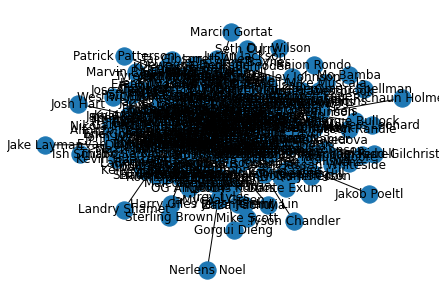

In [177]:
g = nx.Graph()
g.add_weighted_edges_from(highInteraction)
nx.draw_kamada_kawai(g, with_labels=True)

In [176]:
g_max = nx.find_cliques(g)
list(g_max)

[['Darren Collison', 'Thaddeus Young', 'Bojan Bogdanovic', 'Myles Turner'],
 ['Darren Collison', 'Thaddeus Young', 'Bojan Bogdanovic', 'Cory Joseph'],
 ['Jamal Murray', 'Nikola Jokic', 'Paul Millsap', 'Mason Plumlee'],
 ['Jamal Murray', 'Nikola Jokic', 'Malik Beasley', 'Gary Harris'],
 ['Jamal Murray',
  'Nikola Jokic',
  'Malik Beasley',
  'Monte Morris',
  'Mason Plumlee'],
 ['Nene', 'Clint Capela'],
 ['Maxi Kleber', 'Dwight Powell'],
 ['Evan Turner', 'Jake Layman'],
 ['Evan Turner', 'Damian Lillard'],
 ['Trae Young', 'Dewayne Dedmon', 'Alex Len'],
 ['Trae Young', 'Vince Carter', 'John Collins'],
 ['Trae Young', "DeAndre' Bembry", 'Kent Bazemore', 'Kevin Huerter'],
 ['Trae Young', "DeAndre' Bembry", 'Kent Bazemore', 'Taurean Prince'],
 ['Trae Young', 'Jeremy Lin'],
 ['Nerlens Noel', 'Steven Adams'],
 ['Torrey Craig', 'Nikola Jokic'],
 ['Aaron Gordon', 'Jonathan Isaac', 'Nikola Vucevic', 'D.J. Augustin'],
 ['Aaron Gordon', 'Evan Fournier', 'Wes Iwundu'],
 ['Aaron Gordon', 'Evan Fourni

# Q3

## Charles Dickens' *Great Expectations*

For this question we are going to use the following dataset:

In [30]:
with urlopen('https://www.gutenberg.org/files/1400/1400-0.txt') as f:
    raw = f.read()

greatExpectations = raw[1900:1039269].decode('utf8')

These are the names of the major characters in the novel:

In [31]:
names = [
 'Joe',
 'Pip',
 'Wopsle',
 'Hubble',
 'Pumblechook',
 'Richard',
 'Wopsle',
 'Biddy',
 'Havisham',
 'Joseph',
 'Sarah',
 'Estella',
 'Orlick',
 'Mike',
 'Wemmick',
 'Herbert',
 'Pocket',
 'Jane',
 'Flopson',
 'Coiler',
 'Drummle',
 'Jack',
 'Spider',
 'Handel',
 'Herbert',
 'Clara',
 'Skiffins',
 'Magwitch',
 'Provis',
 'Compeyson',
 'Tom',
 'Bill',
 'Barley',
 'Orlick',
 'William']

names.sort()
names

['Barley',
 'Biddy',
 'Bill',
 'Clara',
 'Coiler',
 'Compeyson',
 'Drummle',
 'Estella',
 'Flopson',
 'Handel',
 'Havisham',
 'Herbert',
 'Herbert',
 'Hubble',
 'Jack',
 'Jane',
 'Joe',
 'Joseph',
 'Magwitch',
 'Mike',
 'Orlick',
 'Orlick',
 'Pip',
 'Pocket',
 'Provis',
 'Pumblechook',
 'Richard',
 'Sarah',
 'Skiffins',
 'Spider',
 'Tom',
 'Wemmick',
 'William',
 'Wopsle',
 'Wopsle']

1. Split the text into sentences using a sentence tokenizer from your favorite NLP library.
2. Construct a list of pairs of names: a pair of names (A,B) appears in the list if and only if both A and B appears in the same sentence. When you store the pair (A,B) in the list make sure A appears before B in the alphabetical order.
3. Construct a python dictionary where the keys are pairs of names and values are the number of times each pair appears in the list you constructed in step 2.
4. Filter the list and retain only those pairs that appear more than twice (i.e. 3 or more).
5. Construct a `networkx` graph using the pairs you have from step 4.
6. Display the graph.

In [32]:
swEN = set(stopwords.words('english')) 
def tokenizeText(text, sw=swEN):
    sentences =  [re.sub(r'[^\w\s]','',sentence) for sentence in sent_tokenize(text)]

    tokenizedText = [' '.join([word for word in sentence.split() if not word in sw]) for sentence in sentences]

    return tokenizedText

greatExpectationsT = tokenizeText(greatExpectations)

In [33]:
namePairs = [(names[i], names[j]) for i in range(len(names)) for j in range(i+1, len(names))]
del namePairs[-1]
pairCount = dict(zip(namePairs, [0]*len(namePairs)))

In [34]:
for sentence in greatExpectationsT:
    for (a, b) in namePairs:
        if a in sentence and b in sentence:
            pairCount[(a, b)] = pairCount[(a,b)] + 1

pairCount

{('Barley', 'Biddy'): 0,
 ('Barley', 'Bill'): 7,
 ('Barley', 'Clara'): 6,
 ('Barley', 'Coiler'): 0,
 ('Barley', 'Compeyson'): 0,
 ('Barley', 'Drummle'): 0,
 ('Barley', 'Estella'): 0,
 ('Barley', 'Flopson'): 0,
 ('Barley', 'Handel'): 0,
 ('Barley', 'Havisham'): 0,
 ('Barley', 'Herbert'): 14,
 ('Barley', 'Hubble'): 0,
 ('Barley', 'Jack'): 0,
 ('Barley', 'Jane'): 0,
 ('Barley', 'Joe'): 0,
 ('Barley', 'Joseph'): 0,
 ('Barley', 'Magwitch'): 0,
 ('Barley', 'Mike'): 0,
 ('Barley', 'Orlick'): 0,
 ('Barley', 'Pip'): 0,
 ('Barley', 'Pocket'): 0,
 ('Barley', 'Provis'): 2,
 ('Barley', 'Pumblechook'): 0,
 ('Barley', 'Richard'): 0,
 ('Barley', 'Sarah'): 0,
 ('Barley', 'Skiffins'): 0,
 ('Barley', 'Spider'): 0,
 ('Barley', 'Tom'): 0,
 ('Barley', 'Wemmick'): 0,
 ('Barley', 'William'): 0,
 ('Barley', 'Wopsle'): 0,
 ('Biddy', 'Bill'): 0,
 ('Biddy', 'Clara'): 1,
 ('Biddy', 'Coiler'): 0,
 ('Biddy', 'Compeyson'): 0,
 ('Biddy', 'Drummle'): 0,
 ('Biddy', 'Estella'): 4,
 ('Biddy', 'Flopson'): 0,
 ('Biddy', 'Ha

In [35]:
freqPairs = [item[0] for item in pairCount.items() if item[1] > 2 and item[0][0] != item[0][1]]
freqPairs

[('Barley', 'Bill'),
 ('Barley', 'Clara'),
 ('Barley', 'Herbert'),
 ('Biddy', 'Estella'),
 ('Biddy', 'Havisham'),
 ('Biddy', 'Herbert'),
 ('Biddy', 'Joe'),
 ('Biddy', 'Orlick'),
 ('Biddy', 'Pip'),
 ('Biddy', 'Wopsle'),
 ('Bill', 'Herbert'),
 ('Clara', 'Herbert'),
 ('Drummle', 'Estella'),
 ('Drummle', 'Herbert'),
 ('Drummle', 'Pocket'),
 ('Estella', 'Havisham'),
 ('Estella', 'Herbert'),
 ('Estella', 'Joe'),
 ('Estella', 'Pip'),
 ('Flopson', 'Jane'),
 ('Flopson', 'Pocket'),
 ('Handel', 'Herbert'),
 ('Havisham', 'Herbert'),
 ('Havisham', 'Joe'),
 ('Havisham', 'Pip'),
 ('Havisham', 'Pocket'),
 ('Havisham', 'Provis'),
 ('Havisham', 'Pumblechook'),
 ('Havisham', 'Sarah'),
 ('Havisham', 'Wemmick'),
 ('Herbert', 'Jack'),
 ('Herbert', 'Joe'),
 ('Herbert', 'Pip'),
 ('Herbert', 'Pocket'),
 ('Herbert', 'Provis'),
 ('Herbert', 'Richard'),
 ('Herbert', 'Tom'),
 ('Herbert', 'Wemmick'),
 ('Herbert', 'Wopsle'),
 ('Hubble', 'Joe'),
 ('Hubble', 'Pumblechook'),
 ('Hubble', 'Wopsle'),
 ('Jack', 'Richard'),

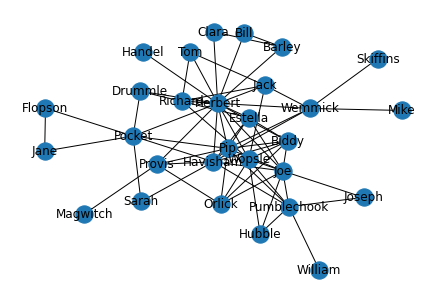

In [36]:
GE_network = nx.Graph()
GE_network.add_edges_from(freqPairs)
nx.draw_kamada_kawai(GE_network, with_labels=True)